<a href="https://colab.research.google.com/github/kd-gwu/blackbird/blob/master/King_David_Newman_SEAS_8414_Home_Work_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
! pip install zeeklog2pandas urllib3 zat

In [85]:
import pandas as pd
from zeeklog2pandas import read_zeek
from zat.dataframe_to_matrix import DataFrameToMatrix

import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
print('Scikit Learn Version:', sklearn.__version__)

Scikit Learn Version: 1.2.2


In [86]:
import urllib.request

file = "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/bro/http.log"
urllib.request.urlretrieve(file, "http.log")

('http.log', <http.client.HTTPMessage at 0x7daf864eb220>)

In [87]:
!head http.log

#separator \x09
#set_separator	,
#empty_field	(empty)
#unset_field	-
#path	http
#open	2017-04-14-18-21-22
#fields	ts	uid	id.orig_h	id.orig_p	id.resp_h	id.resp_p	trans_depth	method	host	uri	referrer	user_agent	request_body_len	response_body_len	status_code	status_msg	info_code	info_msg	filename	tags	username	password	proxied	orig_fuids	orig_mime_types	resp_fuids	resp_mime_types
#types	time	string	addr	port	addr	port	count	string	string	string	string	string	count	count	count	string	count	string	string	set[enum]	string	string	set[string]	vector[string]	vector[string]	vector[string]	vector[string]
1313048976.009048	CMOdlv41VnidnV9uaa	147.32.86.89	3034	90.183.101.168	80	1	GET	static.abradio.cz	/data/ct/77-popup.json?stations_id=77&popup=true&rand=52.008442795285234	http://static.abradio.cz/player/77/184/	Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; InfoPath.1; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)	0	8	200	OK	-	-	-	(empty)	-	-	-	-	-	FINUe64wAr6B9U

In [88]:
df = read_zeek("http.log")  # or conn.log.gz, it will be handled transparently

In [89]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,info_msg,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types
0,1.313049e+09,CMOdlv41VnidnV9uaa,147.32.86.89,3034,90.183.101.168,80,1,GET,static.abradio.cz,/data/ct/77-popup.json?stations_id=77&popup=tr...,...,-,-,(empty),-,-,-,-,-,FINUe64wAr6B9UT8Wf,-
1,1.313049e+09,CYD2FRDS6mPdy4E2f,67.195.111.228,52020,147.32.84.2,80,1,GET,cmp.felk.cvut.cz,/events/omnivis2004/smadja/,...,-,-,(empty),-,-,-,-,-,Fxtjq7DszGBeNdqGf,text/html
2,1.313049e+09,CUobl710GjmYDIPdSd,147.32.86.51,49161,62.84.143.246,80,1,POST,pravednes.cz,/pd/feeder,...,-,-,(empty),-,-,-,FKYbDy1Xm3XhienKxk,text/plain,F3phqF4lcM4OAaUdO5,text/plain
3,1.313049e+09,CoNRHRFWzengDXG2f,66.249.66.81,60995,147.32.86.92,80,1,GET,rtime.felk.cvut.cz,/~sojka/projects/index/blog/blog/archives/2011...,...,-,-,(empty),-,-,-,-,-,FF2Ksg4j0fmNA36prh,text/html
4,1.313049e+09,Cotr5W2ca2lX6EKPd5,147.32.86.20,2744,188.138.84.239,80,1,GET,www.cutline-frankfurt.de,/cutline-C.jpg,...,-,-,(empty),-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330270,1.313064e+09,ChtQKQhj4EkZCNgWe,147.32.84.59,3865,80.239.149.17,80,9,GET,profile.ak.fbcdn.net,/hprofile-ak-snc4/161113_100000452432006_57965...,...,-,-,(empty),-,-,-,-,-,-,-
330271,1.313064e+09,ChtQKQhj4EkZCNgWe,147.32.84.59,3865,80.239.149.17,80,15,GET,profile.ak.fbcdn.net,/hprofile-ak-snc4/195413_534211681_4893508_q.jpg,...,-,-,(empty),-,-,-,-,-,-,-
330272,1.313064e+09,ChtQKQhj4EkZCNgWe,147.32.84.59,3865,80.239.149.17,80,21,GET,profile.ak.fbcdn.net,/hprofile-ak-snc4/274122_1514620342_7247536_q.jpg,...,-,-,(empty),-,-,-,-,-,-,-
330273,1.313064e+09,ChtQKQhj4EkZCNgWe,147.32.84.59,3865,80.239.149.17,80,31,GET,profile.ak.fbcdn.net,/hprofile-ak-snc4/275530_100001261893331_75487...,...,-,-,(empty),-,-,-,-,-,-,-


In [90]:
features = ['id.resp_p', 'method', 'resp_mime_types', 'request_body_len']

In [91]:
# this for real we should explicitly convert before sending to the transformer.
to_matrix = DataFrameToMatrix()
zeek_matrix = to_matrix.fit_transform(df[features], normalize=True)
# print(zeek_matrix.shape)
# zeek_matrix[:1]

Changing column method to category...
Changing column resp_mime_types to category...
Normalizing column id.resp_p...
Normalizing column request_body_len...


/usr/local/lib/python3.10/dist-packages/zat/dataframe_to_matrix.py:109: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[column].cat.add_categories('NaN', inplace=True)


In [92]:
odd_clf = IsolationForest(contamination=0.25) # Marking 25% odd
odd_clf.fit(zeek_matrix)

IsolationForest(contamination=0.25)

In [93]:
# Now we create a new dataframe using the prediction from our classifier
odd_df = df[features][odd_clf.predict(zeek_matrix) == -1]
print(odd_df.shape)
odd_df.head()

(78670, 4)


,id.resp_p,method,resp_mime_types,request_body_len
2,80,POST,text/plain,323.0
6,80,GET,image/jpeg,0.0
9,80,GET,application/xml,0.0
10,80,GET,application/xml,0.0
12,80,GET,application/xml,0.0


In [94]:
odd_matrix = to_matrix.fit_transform(odd_df)

Changing column method to category...
Changing column resp_mime_types to category...
Normalizing column id.resp_p...
Normalizing column request_body_len...


/usr/local/lib/python3.10/dist-packages/zat/dataframe_to_matrix.py:109: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[column].cat.add_categories('NaN', inplace=True)


In [ ]:
# odd_df["cluster"]

In [95]:
# Just some simple stuff for this example, KMeans and PCA
kmeans = KMeans(n_clusters=10).fit_predict(odd_matrix)  # Change this to 3/5 for fun
pca = PCA(n_components=3).fit_transform(odd_matrix)

# Now we can put our ML results back onto our dataframe!
odd_df['x'] = pca[:, 0] # PCA X Column
odd_df['y'] = pca[:, 1] # PCA Y Column
odd_df['cluster'] = kmeans
odd_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id.resp_p,method,resp_mime_types,request_body_len,x,y,cluster
2,80,POST,text/plain,323.0,-27.456676,1.045721,7
6,80,GET,image/jpeg,0.0,-27.453938,-0.721391,5
9,80,GET,application/xml,0.0,-27.453823,-0.394236,0
10,80,GET,application/xml,0.0,-27.453823,-0.394236,0
12,80,GET,application/xml,0.0,-27.453823,-0.394236,0


In [96]:
# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14.0
plt.rcParams['figure.figsize'] = 15.0, 6.0

# Helper method for scatter/beeswarm plot
def jitter(arr):
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

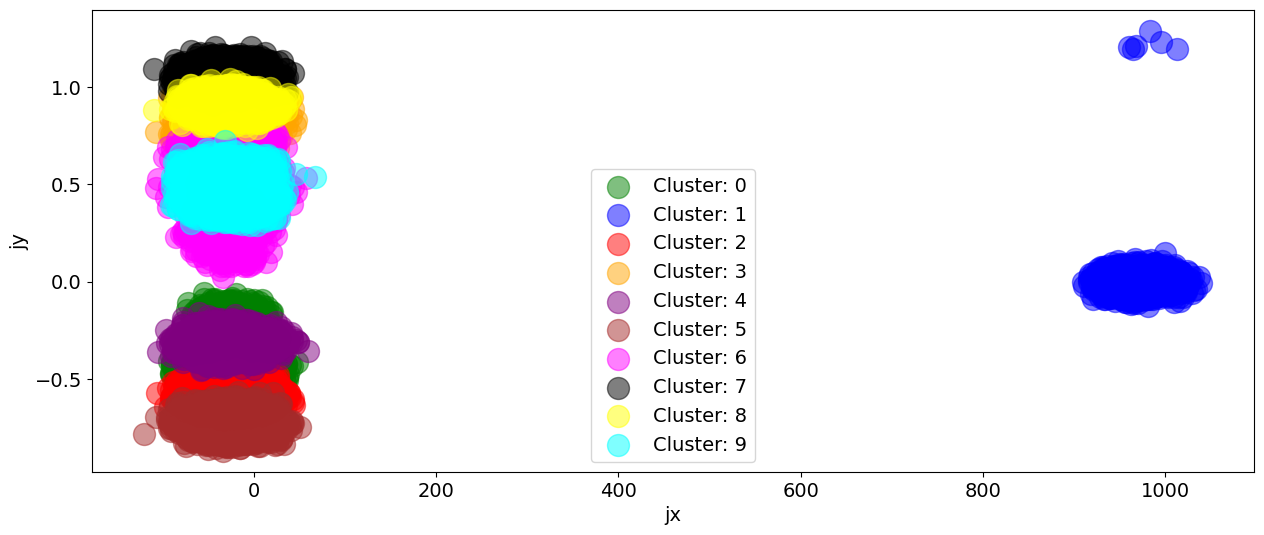

In [97]:
import numpy as np
# Jitter so we can see instances that are projected coincident in 2D
odd_df['jx'] = jitter(odd_df['x'])
odd_df['jy'] = jitter(odd_df['y'])

# Now use dataframe group by cluster
cluster_groups = odd_df.groupby('cluster')

# Plot the Machine Learning results
colors = {0:'green', 1:'blue', 2:'red', 3:'orange', 4:'purple', 5:'brown', 6:'magenta', 7:'black', 8:'yellow', 9:'cyan' }
fig, ax = plt.subplots()
for key, group in cluster_groups:
    group.plot(ax=ax, kind='scatter', x='jx', y='jy', alpha=0.5, s=250,
               label='Cluster: {:d}'.format(key), color=colors[key])

In [98]:
# Now print out the details for each cluster
pd.set_option('display.width', 1000)
for key, group in cluster_groups:
    print('\nCluster {:d}: {:d} observations'.format(key, len(group)))
    print(group[features].head())


Cluster 0: 10933 observations
    id.resp_p method  resp_mime_types  request_body_len
9          80    GET  application/xml               0.0
10         80    GET  application/xml               0.0
12         80    GET  application/xml               0.0
13         80    GET  application/xml               0.0
14         80    GET  application/xml               0.0

Cluster 1: 2162 observations
      id.resp_p method resp_mime_types  request_body_len
1198         80    GET             NaN               NaN
1679         80    GET             NaN               NaN
1889         80    GET             NaN               NaN
1907         80    GET             NaN               NaN
2041         80    GET             NaN               NaN

Cluster 2: 10443 observations
     id.resp_p method resp_mime_types  request_body_len
239         80    GET       image/png               0.0
241         80    GET       image/png               0.0
291         80    GET       image/png               0.0
292   